### Variable Selection and EDA

This code runs variable selection and EDA on the training data and features from the feature engineering

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn.linear_model import LassoCV

import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
import warnings

import boto3
from sagemaker import get_execution_role

# There is a warning when using distplot in seaborn that needs to be fixed in the package - supressing it for now
warnings.filterwarnings("ignore", module="matplotlib")

pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)

from VarSelection import VarSelection as vs
from FeatureProfiler import FeatureProfiler as fp

In [2]:
role = get_execution_role()
region = boto3.Session().region_name
bucket = "udacity-machine-learning-capstone-data"
key = "udacity_capstone_data/all_trans.pkl"

In [3]:
s3c = boto3.client("s3")

# Train
key = "train_df_features.csv"
obj = s3c.get_object(Bucket=bucket, Key=key)
train_df = pd.read_csv(obj["Body"])

In [4]:
train_df = train_df.replace([np.inf, -np.inf], 0)
train_df.head()

CUST_CODE   PROD_CODE  TARGET  SPEND_PROD_CODE_52  \
0  CUST0000203043  PRD0900001     0.0                0.00   
1  CUST0000240308  PRD0900001     0.0                0.00   
2  CUST0000285663  PRD0900001     0.0                0.00   
3  CUST0000620533  PRD0900001     1.0                6.75   
4  CUST0000728571  PRD0900001     1.0                6.75   

   QUANTITY_PROD_CODE_52  VISITS_PROD_CODE_52  SPEND_PROD_CODE_26  \
0                    0.0                  0.0                 0.0   
1                    0.0                  0.0                 0.0   
2                    0.0                  0.0                 0.0   
3                    3.0                  1.0                 0.0   
4                    3.0                  1.0                 0.0   

   QUANTITY_PROD_CODE_26  VISITS_PROD_CODE_26  SPEND_PROD_CODE_8  \
0                    0.0                  0.0                0.0   
1                    0.0                  0.0                0.0   
2                    0.0                  0.0                0.0   
3                    0.0                  0.0                0.0   
4                    0.0                  0.0                0.0   

   QUANTITY_PROD_CODE_8  VISITS_PROD_CODE_8  SPEND_PROD_CODE_1  \
0                   0.0                 0.0                0.0   
1                   0.0                 0.0                0.0   
2                   0.0                 0.0                0.0   
3                   0.0                 0.0                0.0   
4                   0.0                 0.0                0.0   

   QUANTITY_PROD_CODE_1  VISITS_PROD_CODE_1  SPEND_PROD_CODE_10_52  \
0                   0.0                 0.0                   0.00   
1                   0.0                 0.0                   0.00   
2                   0.0                 0.0                   0.00   
3                   0.0                 0.0                   6.75   
4                   0.0                 0.0                  46.01   

   QUANTITY_PROD_CODE_10_52  VISITS_PROD_CODE_10_52  SPEND_PROD_CODE_10_26  \
0                       0.0                     0.0                   0.00   
1                       0.0                     0.0                   0.00   
2                       0.0                     0.0                   0.00   
3                       3.0                     1.0                   0.00   
4                      16.0                    10.0                   6.04   

   QUANTITY_PROD_CODE_10_26  VISITS_PROD_CODE_10_26  SPEND_PROD_CODE_10_8  \
0                       0.0                     0.0                  0.00   
1                       0.0                     0.0                  0.00   
2                       0.0                     0.0                  0.00   
3                       0.0                     0.0                  0.00   
4                       2.0                     2.0                  6.04   

   QUANTITY_PROD_CODE_10_8  VISITS_PROD_CODE_10_8  SPEND_PROD_CODE_10_1  \
0                      0.0                    0.0                   0.0   
1                      0.0                    0.0                   0.0   
2                      0.0                    0.0                   0.0   
3                      0.0                    0.0                   0.0   
4                      2.0                    2.0                   0.0   

   QUANTITY_PROD_CODE_10_1  VISITS_PROD_CODE_10_1  SPEND_PROD_CODE_20_52  \
0                      0.0                    0.0                   0.00   
1                      0.0                    0.0                   0.00   
2                      0.0                    0.0                   0.00   
3                      0.0                    0.0                   6.75   
4                      0.0                    0.0                  71.37   

   QUANTITY_PROD_CODE_20_52  VISITS_PROD_CODE_20_52  SPEND_PROD_CODE_20_26  \
0                       0.0                     0.0                   0.00   
1  

In [5]:
# Keep only the variables to analyze (drop CUST_CODE, PROD_CODE)
train_df_var_eda = train_df.drop(["CUST_CODE", "PROD_CODE"], axis=1)

# Create the var_selection object
var_selection = vs.variable_selection(
    train_df_var_eda, "TARGET", k_features=200, random_state=1
)

### Test Squared Correlation

Calaculate the squared pearson correlation between each feature and the target variable

In [6]:
squared_corr = var_selection.squared_corr()
squared_corr

Run time: VarSelection.VarSelection.variable_selection.squared_corr ran in 10.08 sec


features  Squared_Correlation
150                     CHNG_VISITS_PROD_CODE_40_26_52             0.327115
149                   CHNG_QUANTITY_PROD_CODE_40_26_52             0.305410
163                 TIME_BTWN_MEDIAN_CUST_PROD_CODE_40             0.301783
173               TIME_BTWN_RATIO_OVERALL_PROD_CODE_30             0.300372
148                      CHNG_SPEND_PROD_CODE_40_26_52             0.299221
167                  TIME_BTWN_RATIO_OVERALL_PROD_CODE             0.299153
171               TIME_BTWN_RATIO_OVERALL_PROD_CODE_20             0.299108
165                        TIME_BTWN_LAST_PROD_CODE_40             0.298942
169               TIME_BTWN_RATIO_OVERALL_PROD_CODE_10             0.298325
160                 TIME_BTWN_MEDIAN_CUST_PROD_CODE_30             0.298000
164              TIME_BTWN_MEDIAN_OVERALL_PROD_CODE_40             0.297167
161              TIME_BTWN_MEDIAN_OVERALL_PROD_CODE_30             0.296706
158              TIME_BTWN_MEDIAN_OVERALL_PROD_CODE_20             0.296572
155              TIME_BTWN_MEDIAN_OVERALL_PROD_CODE_10             0.296347
166                     TIME_BTWN_RATIO_CUST_PROD_CODE             0.296293
157                 TIME_BTWN_MEDIAN_CUST_PROD_CODE_20             0.294957
154                 TIME_BTWN_MEDIAN_CUST_PROD_CODE_10             0.291663
162                        TIME_BTWN_LAST_PROD_CODE_30             0.291561
168                  TIME_BTWN_RATIO_CUST_PROD_CODE_10             0.290730
152                 TIME_BTWN_MEDIAN_OVERALL_PROD_CODE             0.290698
175               TIME_BTWN_RATIO_OVERALL_PROD_CODE_40             0.290609
151                    TIME_BTWN_MEDIAN_CUST_PROD_CODE             0.288547
159                        TIME_BTWN_LAST_PROD_CODE_20             0.286468
170                  TIME_BTWN_RATIO_CUST_PROD_CODE_20             0.284825
156                        TIME_BTWN_LAST_PROD_CODE_10             0.282265
153                           TIME_BTWN_LAST_PROD_CODE             0.278737
132                     CHNG_VISITS_PROD_CODE_30_26_52             0.273669
131                   CHNG_QUANTITY_PROD_CODE_30_26_52             0.262595
130                      CHNG_SPEND_PROD_CODE_30_26_52             0.260126
172                  TIME_BTWN_RATIO_CUST_PROD_CODE_30             0.258082
114                     CHNG_VISITS_PROD_CODE_20_26_52             0.242285
113                   CHNG_QUANTITY_PROD_CODE_20_26_52             0.236079
112                      CHNG_SPEND_PROD_CODE_20_26_52             0.234032
144                      CHNG_VISITS_PROD_CODE_40_8_26             0.222577
96                      CHNG_VISITS_PROD_CODE_10_26_52             0.221512
95                    CHNG_QUANTITY_PROD_CODE_10_26_52             0.218091
51                              VISITS_PROD_CODE_40_52             0.217314
94                       CHNG_SPEND_PROD_CODE_10_26_52             0.217173
143                    CHNG_QUANTITY_PROD_CODE_40_8_26             0.209588
78                         CHNG_VISITS_PROD_CODE_26_52             0.209201
77                       CHNG_QUANTITY_PROD_CODE_26_52             0.207350
76                          CHNG_SPEND_PROD_CODE_26_52             0.207207
142                       CHNG_SPEND_PROD_CODE_40_8_26             0.206782
54                              VISITS_PROD_CODE_40_26             0.206609
57                               VISITS_PROD_CODE_40_8             0.197641
174                  TIME_BTWN_RATIO_CUST_PROD_CODE_40             0.191654
206                     BASKET_SIZE_VISITS_CUST_CODE_L             0.183469
126                      CHNG_VISITS_PROD_CODE_30_8_26             0.176057
125                    CHNG_QUANTITY_PROD_CODE_30_8_26             0.169424
124                       CHNG_SPEND_PROD_CODE_30_8_26             0.167302
39                              VISITS_PROD_CODE_30_52             0.164443
258                BASKET_TYPE_VISITS_CUST_CODE_Top Up             0.160778
240               

### Random Forest Importance

Calculate the RF Importance for each feature

In [7]:
forest = RandomForestClassifier(
    n_estimators=500, random_state=0, oob_score=True, n_jobs=-1
)

rf_importance = var_selection.rf_imp_rank(forest)
rf_importance

Run time: VarSelection.VarSelection.variable_selection.rf_imp_rank ran in 1 min 5.57 sec


features  rf_importance  rf_rank
59                               SPEND_PROD_CODE_40_52       0.034568        1
23                               SPEND_PROD_CODE_10_52       0.028009        2
60                            QUANTITY_PROD_CODE_40_52       0.026315        3
47                               SPEND_PROD_CODE_30_52       0.023874        4
13                                 VISITS_PROD_CODE_52       0.023451        5
25                              VISITS_PROD_CODE_10_52       0.018678        6
49                              VISITS_PROD_CODE_30_52       0.017462        7
11                                  SPEND_PROD_CODE_52       0.017171        8
36                            QUANTITY_PROD_CODE_20_52       0.015774        9
37                              VISITS_PROD_CODE_20_52       0.014715       10
24                            QUANTITY_PROD_CODE_10_52       0.014569       11
48                            QUANTITY_PROD_CODE_30_52       0.013329       12
64                              VISITS_PROD_CODE_40_26       0.013121       13
61                              VISITS_PROD_CODE_40_52       0.012120       14
159                   CHNG_QUANTITY_PROD_CODE_40_26_52       0.011531       15
35                               SPEND_PROD_CODE_20_52       0.011420       16
260                 BASKET_TYPE_SPEND_CUST_CODE_Top Up       0.010613       17
62                               SPEND_PROD_CODE_40_26       0.010462       18
158                      CHNG_SPEND_PROD_CODE_40_26_52       0.010283       19
187        BASKET_PRICE_SENSITIVITY_SPEND_CUST_CODE_MM       0.008513       20
12                               QUANTITY_PROD_CODE_52       0.008163       21
153                    CHNG_QUANTITY_PROD_CODE_40_8_26       0.008042       22
157                      CHNG_VISITS_PROD_CODE_40_8_52       0.007727       23
246                WKDAY_WKEND_SPEND_CUST_CODE_WEEKDAY       0.007686       24
160                     CHNG_VISITS_PROD_CODE_40_26_52       0.007644       25
247                WKDAY_WKEND_SPEND_CUST_CODE_WEEKEND       0.007438       26
52                              VISITS_PROD_CODE_30_26       0.007334       27
249             WKDAY_WKEND_QUANTITY_CUST_CODE_WEEKEND       0.007199       28
264              BASKET_TYPE_QUANTITY_CUST_CODE_Top Up       0.006877       29
282      BASKET_DOMINANT_MISSION_SPEND_CUST_CODE_Fresh       0.006672       30
63                            QUANTITY_PROD_CODE_40_26       0.006517       31
228                 DAY_PART_SPEND_CUST_CODE_AFTERNOON       0.006413       32
191     BASKET_PRICE_SENSITIVITY_QUANTITY_CUST_CODE_MM       0.006393       33
67                               VISITS_PROD_CODE_40_8       0.006115       34
411                                      USER_factor_0       0.006115       35
210                      BASKET_SIZE_SPEND_CUST_CODE_L       0.005841       36
229                   DAY_PART_SPEND_CUST_CODE_EVENING       0.005723       37
66                             QUANTITY_PROD_CODE_40_8       0.005613       38
140                      CHNG_SPEND_PROD_CODE_30_26_52       0.005589       39
154                      CHNG_VISITS_PROD_CODE_40_8_26       0.005531       40
415                                      USER_factor_4       0.005363       41
248             WKDAY_WKEND_QUANTITY_CUST_CODE_WEEKDAY       0.005081       42
50                               SPEND_PROD_CODE_30_26       0.004950       43
141                   CHNG_QUANTITY_PROD_CODE_30_26_52       0.004826       44
268                BASKET_TYPE_VISITS_CUST_CODE_Top Up       0.004751       45
414                                      USER_factor_3       0.004722       46
230                   DAY_PART_SPEND_CUST_CODE_MORNING       0.004721       47
287   BASKET_DOMINANT_MISSION_QUANTITY_CUST_CODE_Fresh       0.004715       48
412                                      USER_factor_1       0.004691       49
413                                      USER_factor_2       0.004574       50
38               

### Absolute regression coefficients

In [8]:
# L1
lr_l1 = linear_model.LogisticRegression(penalty="l1", C=0.01, solver="liblinear")
lm_reg_coeff_l1 = var_selection.abs_reg_coeffs(lr_l1, scale=True)
lm_reg_coeff_l1

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


Run time: VarSelection.VarSelection.variable_selection.abs_reg_coeffs ran in 3.67 sec


features     coeff  coeff_abs  \
268                    BASKET_TYPE_VISITS_CUST_CODE_XX  0.724444   0.724444   
160                    TIME_BTWN_MEDIAN_CUST_PROD_CODE  0.645803   0.645803   
154                       CHNG_SPEND_PROD_CODE_40_8_52  0.466269   0.466269   
185        BASKET_PRICE_SENSITIVITY_SPEND_CUST_CODE_LA -0.393913   0.393913   
411                                      USER_factor_1 -0.353976   0.353976   
214                   BASKET_SIZE_QUANTITY_CUST_CODE_S -0.283262   0.283262   
264                  BASKET_TYPE_QUANTITY_CUST_CODE_XX -0.281353   0.281353   
212                   BASKET_SIZE_QUANTITY_CUST_CODE_L  0.279612   0.279612   
228                   DAY_PART_SPEND_CUST_CODE_EVENING  0.251697   0.251697   
348                 BASKET_SIZE_PROP_SPEND_PROD_CODE_M -0.249967   0.249967   
236            DAY_PART_PROP_SPEND_CUST_CODE_AFTERNOON  0.240833   0.240833   
262          BASKET_TYPE_QUANTITY_CUST_CODE_Small Shop  0.207890   0.207890   
413                                      USER_factor_3  0.186987   0.186987   
173              TIME_BTWN_MEDIAN_OVERALL_PROD_CODE_40 -0.179388   0.179388   
415                                      ITEM_factor_0  0.174595   0.174595   
219                 BASKET_SIZE_PROP_SPEND_CUST_CODE_M  0.165306   0.165306   
321                   STORE_FORMAT_VISITS_CUST_CODE_SS  0.159067   0.159067   
211                      BASKET_SIZE_SPEND_CUST_CODE_S -0.158196   0.158196   
192     BASKET_PRICE_SENSITIVITY_QUANTITY_CUST_CODE_XX  0.156383   0.156383   
60                              VISITS_PROD_CODE_40_52  0.155167   0.155167   
323               STORE_FORMAT_PROP_SPEND_CUST_CODE_LS -0.146998   0.146998   
156                      CHNG_VISITS_PROD_CODE_40_8_52 -0.137262   0.137262   
155                    CHNG_QUANTITY_PROD_CODE_40_8_52 -0.133445   0.133445   
195       BASKET_PRICE_SENSITIVITY_VISITS_CUST_CODE_UM  0.120789   0.120789   
278       BASKET_TYPE_PROP_VISITS_CUST_CODE_Small Shop -0.120601   0.120601   
329            STORE_FORMAT_PROP_QUANTITY_CUST_CODE_SS -0.120074   0.120074   
4                                    CUST_LIFESTAGE_OF  0.119592   0.119592   
2                            CUST_PRICE_SENSITIVITY_XX  0.115920   0.115920   
414                                      USER_factor_4 -0.102215   0.102215   
259                 BASKET_TYPE_SPEND_CUST_CODE_Top Up -0.099920   0.099920   
257              BASKET_TYPE_SPEND_CUST_CODE_Full Shop  0.092633   0.092633   
381           BASKET_TYPE_PROP_VISITS_PROD_CODE_Top Up -0.087616   0.087616   
186        BASKET_PRICE_SENSITIVITY_SPEND_CUST_CODE_MM  0.086912   0.086912   
355                BASKET_SIZE_PROP_VISITS_PROD_CODE_S -0.085780   0.085780   
310   BASKET_DOMINANT_MISSION_PROP_VISITS_CUST_CODE_XX  0.085344   0.085344   
203  BASKET_PRICE_SENSITIVITY_PROP_QUANTITY_CUST_CO...  0.085101   0.085101   
10                                  SPEND_PROD_CODE_52  0.082609   0.082609   
253        WKDAY_WKEND_PROP_QUANTITY_CUST_CODE_WEEKDAY  0.075697   0.075697   
153                      CHNG_VISITS_PROD_CODE_40_8_26  0.073115   0.073115   
5                                    CUST_LIFESTAGE_OT  0.066098   0.066098   
59                            QUANTITY_PROD_CODE_40_52  0.065351   0.065351   
315                 STORE_FORMAT_QUANTITY_CUST_CODE_LS -0.062164   0.062164   
335   BASKET_PRICE_SENSITIVITY_PROP_SPEND_PROD_CODE_LA  0.061320   0.061320   
331              STORE_FORMAT_PROP_VISITS_CUST_CODE_LS  0.051424   0.051424   
384  BASKET_DOMINANT_MISSION_PROP_SPEND_PROD_CODE_G... -0.049467   0.049467   
0                            CUST_PRICE_SENSITIVITY_MM -0.049087   0.049087   
272                BASKET_TYPE_PROP_SPEND_CUST_CODE_XX  0.046801   0.046801   
365           WKDAY_WKEND_PROP_SPEND_PROD_CODE_WEEKDAY -0.046493   0.046493   
317                 STORE_FORMAT_QUANTITY_CUST_CODE_SS  0.045537   0.045537   
311                    STORE_FORMAT_SPEND_CUST_CODE_LS  0.044398   0.044398   
398              

In [9]:
# L2
lr_l2 = linear_model.LogisticRegression(
    penalty="l2", C=0.01, solver="lbfgs", max_iter=2000
)
lm_reg_coeff_l2 = var_selection.abs_reg_coeffs(lr_l2, scale=True)
lm_reg_coeff_l2

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


Run time: VarSelection.VarSelection.variable_selection.abs_reg_coeffs ran in 3.0 sec


features     coeff  coeff_abs  \
268                    BASKET_TYPE_VISITS_CUST_CODE_XX  0.561686   0.561686   
264                  BASKET_TYPE_QUANTITY_CUST_CODE_XX -0.543844   0.543844   
160                    TIME_BTWN_MEDIAN_CUST_PROD_CODE  0.514508   0.514508   
332              STORE_FORMAT_PROP_VISITS_CUST_CODE_MS -0.489982   0.489982   
411                                      USER_factor_1 -0.478956   0.478956   
228                   DAY_PART_SPEND_CUST_CODE_EVENING  0.474609   0.474609   
214                   BASKET_SIZE_QUANTITY_CUST_CODE_S -0.441601   0.441601   
185        BASKET_PRICE_SENSITIVITY_SPEND_CUST_CODE_LA -0.416912   0.416912   
212                   BASKET_SIZE_QUANTITY_CUST_CODE_L  0.396456   0.396456   
262          BASKET_TYPE_QUANTITY_CUST_CODE_Small Shop  0.387805   0.387805   
13                                  SPEND_PROD_CODE_26  0.379734   0.379734   
333              STORE_FORMAT_PROP_VISITS_CUST_CODE_SS  0.372615   0.372615   
329            STORE_FORMAT_PROP_QUANTITY_CUST_CODE_SS -0.371965   0.371965   
154                       CHNG_SPEND_PROD_CODE_40_8_52  0.348421   0.348421   
195       BASKET_PRICE_SENSITIVITY_VISITS_CUST_CODE_UM  0.348081   0.348081   
266            BASKET_TYPE_VISITS_CUST_CODE_Small Shop -0.344890   0.344890   
236            DAY_PART_PROP_SPEND_CUST_CODE_AFTERNOON  0.342419   0.342419   
334             STORE_FORMAT_PROP_VISITS_CUST_CODE_XLS  0.330459   0.330459   
216                     BASKET_SIZE_VISITS_CUST_CODE_M  0.319813   0.319813   
189     BASKET_PRICE_SENSITIVITY_QUANTITY_CUST_CODE_LA  0.318930   0.318930   
229                   DAY_PART_SPEND_CUST_CODE_MORNING -0.309914   0.309914   
186        BASKET_PRICE_SENSITIVITY_SPEND_CUST_CODE_MM  0.299145   0.299145   
275         BASKET_TYPE_PROP_QUANTITY_CUST_CODE_Top Up  0.297702   0.297702   
321                   STORE_FORMAT_VISITS_CUST_CODE_SS  0.297400   0.297400   
328            STORE_FORMAT_PROP_QUANTITY_CUST_CODE_MS  0.281850   0.281850   
192     BASKET_PRICE_SENSITIVITY_QUANTITY_CUST_CODE_XX  0.272750   0.272750   
230              DAY_PART_QUANTITY_CUST_CODE_AFTERNOON -0.269827   0.269827   
220                 BASKET_SIZE_PROP_SPEND_CUST_CODE_S -0.269824   0.269824   
288   BASKET_DOMINANT_MISSION_QUANTITY_CUST_CODE_Mixed -0.267676   0.267676   
285         BASKET_DOMINANT_MISSION_SPEND_CUST_CODE_XX -0.259149   0.259149   
259                 BASKET_TYPE_SPEND_CUST_CODE_Top Up -0.253805   0.253805   
162                           TIME_BTWN_LAST_PROD_CODE  0.248644   0.248644   
52                                SPEND_PROD_CODE_30_8 -0.248003   0.248003   
224                BASKET_SIZE_PROP_VISITS_CUST_CODE_L -0.241975   0.241975   
299  BASKET_DOMINANT_MISSION_PROP_SPEND_CUST_CODE_N... -0.241094   0.241094   
271            BASKET_TYPE_PROP_SPEND_CUST_CODE_Top Up -0.240961   0.240961   
187        BASKET_PRICE_SENSITIVITY_SPEND_CUST_CODE_UM -0.238627   0.238627   
348                 BASKET_SIZE_PROP_SPEND_PROD_CODE_M -0.237522   0.237522   
297  BASKET_DOMINANT_MISSION_PROP_SPEND_CUST_CODE_G...  0.234686   0.234686   
219                 BASKET_SIZE_PROP_SPEND_CUST_CODE_M  0.224568   0.224568   
313                    STORE_FORMAT_SPEND_CUST_CODE_SS -0.223270   0.223270   
225                BASKET_SIZE_PROP_VISITS_CUST_CODE_M -0.217905   0.217905   
25                               SPEND_PROD_CODE_10_26  0.217818   0.217818   
40                                SPEND_PROD_CODE_20_8 -0.214816   0.214816   
227                 DAY_PART_SPEND_CUST_CODE_AFTERNOON  0.211706   0.211706   
415                                      ITEM_factor_0  0.211307   0.211307   
326              STORE_FORMAT_PROP_SPEND_CUST_CODE_XLS -0.209174   0.209174   
303  BASKET_DOMINANT_MISSION_PROP_QUANTITY_CUST_COD...  0.207373   0.207373   
173              TIME_BTWN_MEDIAN_OVERALL_PROD_CODE_40 -0.204697   0.204697   
274     BASKET_TYPE_PROP_QUANTITY_CUST_CODE_Small Shop -0.203871   0.203871   
350              

### Recursive Feature Elimination

Runs RFE on the specified classifier

Optimal number of features : 18


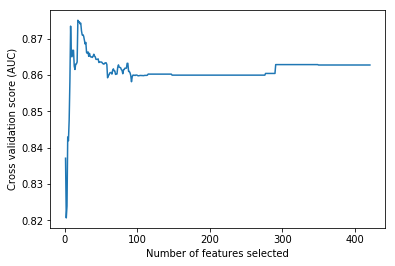

Run time: VarSelection.VarSelection.variable_selection.rfe ran in 47 min 36.29 sec


In [10]:
clf = LassoCV(max_iter=2000, tol=2, cv=2)
rfe_selection = var_selection.rfe(clf, 2, "roc_auc")

In [11]:
rfe_selection

Index(['SPEND_PROD_CODE_52', 'QUANTITY_PROD_CODE_52', 'VISITS_PROD_CODE_52',
       'SPEND_PROD_CODE_26', 'QUANTITY_PROD_CODE_26', 'VISITS_PROD_CODE_26',
       'VISITS_PROD_CODE_10_52', 'SPEND_PROD_CODE_10_26',
       'QUANTITY_PROD_CODE_10_26', 'VISITS_PROD_CODE_10_26',
       'VISITS_PROD_CODE_20_52', 'VISITS_PROD_CODE_20_26',
       'VISITS_PROD_CODE_30_52', 'VISITS_PROD_CODE_40_52',
       'TIME_BTWN_RATIO_CUST_PROD_CODE_30',
       'BASKET_PRICE_SENSITIVITY_SPEND_CUST_CODE_XX',
       'BASKET_PRICE_SENSITIVITY_VISITS_CUST_CODE_MM',
       'BASKET_SIZE_VISITS_CUST_CODE_L'],
      dtype='object')

### Feature Agglomeration

Run feature agglomeration to get clusters of related features

In [12]:
var_clusters = var_selection.feat_agglom(50, True)
var_clusters

Run time: VarSelection.VarSelection.variable_selection.feat_agglom ran in 4.07 sec


features  Cluster_Number
381       BASKET_TYPE_PROP_VISITS_PROD_CODE_Small Shop               0
373        BASKET_TYPE_PROP_SPEND_PROD_CODE_Small Shop               0
349                 BASKET_SIZE_PROP_SPEND_PROD_CODE_M               0
356                BASKET_SIZE_PROP_VISITS_PROD_CODE_S               0
355                BASKET_SIZE_PROP_VISITS_PROD_CODE_M               0
353              BASKET_SIZE_PROP_QUANTITY_PROD_CODE_S               0
352              BASKET_SIZE_PROP_QUANTITY_PROD_CODE_M               0
350                 BASKET_SIZE_PROP_SPEND_PROD_CODE_S               0
377     BASKET_TYPE_PROP_QUANTITY_PROD_CODE_Small Shop               0
295   BASKET_DOMINANT_MISSION_VISITS_CUST_CODE_Nonfood               1
218                     BASKET_SIZE_VISITS_CUST_CODE_S               1
215                   BASKET_SIZE_QUANTITY_CUST_CODE_S               1
212                      BASKET_SIZE_SPEND_CUST_CODE_S               1
290  BASKET_DOMINANT_MISSION_QUANTITY_CUST_CODE_Non...               1
305  BASKET_DOMINANT_MISSION_PROP_QUANTITY_CUST_COD...               1
310  BASKET_DOMINANT_MISSION_PROP_VISITS_CUST_CODE_...               1
300  BASKET_DOMINANT_MISSION_PROP_SPEND_CUST_CODE_N...               1
189        BASKET_PRICE_SENSITIVITY_SPEND_CUST_CODE_XX               1
285    BASKET_DOMINANT_MISSION_SPEND_CUST_CODE_Nonfood               1
252           WKDAY_WKEND_PROP_SPEND_CUST_CODE_WEEKDAY               2
307  BASKET_DOMINANT_MISSION_PROP_VISITS_CUST_CODE_...               2
243           DAY_PART_PROP_VISITS_CUST_CODE_AFTERNOON               2
240         DAY_PART_PROP_QUANTITY_CUST_CODE_AFTERNOON               2
256          WKDAY_WKEND_PROP_VISITS_CUST_CODE_WEEKDAY               2
237            DAY_PART_PROP_SPEND_CUST_CODE_AFTERNOON               2
254        WKDAY_WKEND_PROP_QUANTITY_CUST_CODE_WEEKDAY               2
297  BASKET_DOMINANT_MISSION_PROP_SPEND_CUST_CODE_F...               2
302  BASKET_DOMINANT_MISSION_PROP_QUANTITY_CUST_COD...               2
384  BASKET_DOMINANT_MISSION_PROP_SPEND_PROD_CODE_F...               3
389  BASKET_DOMINANT_MISSION_PROP_QUANTITY_PROD_COD...               3
338   BASKET_PRICE_SENSITIVITY_PROP_SPEND_PROD_CODE_UM               3
342  BASKET_PRICE_SENSITIVITY_PROP_QUANTITY_PROD_CO...               3
394  BASKET_DOMINANT_MISSION_PROP_VISITS_PROD_CODE_...               3
346  BASKET_PRICE_SENSITIVITY_PROP_VISITS_PROD_CODE_UM               3
370          WKDAY_WKEND_PROP_VISITS_PROD_CODE_WEEKDAY               4
366           WKDAY_WKEND_PROP_SPEND_PROD_CODE_WEEKDAY               4
407              STORE_FORMAT_PROP_VISITS_PROD_CODE_LS               4
403            STORE_FORMAT_PROP_QUANTITY_PROD_CODE_LS               4
399               STORE_FORMAT_PROP_SPEND_PROD_CODE_LS               4
368        WKDAY_WKEND_PROP_QUANTITY_PROD_CODE_WEEKDAY               4
224              BASKET_SIZE_PROP_QUANTITY_CUST_CODE_S               5
279       BASKET_TYPE_PROP_VISITS_CUST_CODE_Small Shop               5
275     BASKET_TYPE_PROP_QUANTITY_CUST_CODE_Small Shop               5
227                BASKET_SIZE_PROP_VISITS_CUST_CODE_S               5
226                BASKET_SIZE_PROP_VISITS_CUST_CODE_M               5
271        BASKET_TYPE_PROP_SPEND_CUST_CODE_Small Shop               5
220                 BASKET_SIZE_PROP_SPEND_CUST_CODE_M               5
221                 BASKET_SIZE_PROP_SPEND_CUST_CODE_S               5
223              BASKET_SIZE_PROP_QUANTITY_CUST_CODE_M               5
376      BASKET_TYPE_PROP_QUANTITY_PROD_CODE_Full Shop               6
348                 BASKET_SIZE_PROP_SPEND_PROD_CODE_L               6
386  BASKET_DOMINANT_MISSION_PROP_SPEND_PROD_CODE_M...               6
372         BASKET_TYPE_PROP_SPEND_PROD_CODE_Full Shop               6
351              BASKET_SIZE_PROP_QUANTITY_PROD_CODE_L               6
396  BASKET_DOMINANT_MISSION_PROP_VISITS_PROD_CODE_...               6
354                BASKET_SIZE_PROP_VISITS_PROD_CODE_L               6

### Merge metrics

Merge the results from squared correlation, absolute coefficients, RF Importance and RFE

In [13]:
# merge the feature agglomeration to the RF importance
comp = var_clusters.merge(
    rf_importance[["features", "rf_importance", "rf_rank"]], on="features", how="left"
)

# merge the squared correlation
comp = comp.merge(squared_corr, on="features", how="left")

# merge the l1 regression absolute coefficents
lm_reg_coeff_l1 = lm_reg_coeff_l1.loc[:, ["features", "coeff_abs", "coeff_rank"]]
lm_reg_coeff_l1.rename(
    columns={"coeff_abs": "coeff_abs_l1", "coeff_rank": "coeff_rank_l1"}, inplace=True
)
comp = comp.merge(lm_reg_coeff_l1, on="features", how="left")

# merge the l2 regression absolute coefficents
lm_reg_coeff_l2 = lm_reg_coeff_l2.loc[:, ["features", "coeff_abs", "coeff_rank"]]
lm_reg_coeff_l2.rename(
    columns={"coeff_abs": "coeff_abs_l2", "coeff_rank": "coeff_rank_l2"}, inplace=True
)
comp = comp.merge(lm_reg_coeff_l2, on="features", how="left")

# Create a flag if the variable was selected during the RFE
in_rfe = pd.DataFrame(rfe_selection)
in_rfe.columns = ["features"]
in_rfe.loc[:, "selected_RFE"] = "Y"
comp = comp.merge(in_rfe, on="features", how="left")

comp

features  Cluster_Number  \
0         BASKET_TYPE_PROP_VISITS_PROD_CODE_Small Shop               0   
1          BASKET_TYPE_PROP_SPEND_PROD_CODE_Small Shop               0   
2                   BASKET_SIZE_PROP_SPEND_PROD_CODE_M               0   
3                  BASKET_SIZE_PROP_VISITS_PROD_CODE_S               0   
4                  BASKET_SIZE_PROP_VISITS_PROD_CODE_M               0   
5                BASKET_SIZE_PROP_QUANTITY_PROD_CODE_S               0   
6                BASKET_SIZE_PROP_QUANTITY_PROD_CODE_M               0   
7                   BASKET_SIZE_PROP_SPEND_PROD_CODE_S               0   
8       BASKET_TYPE_PROP_QUANTITY_PROD_CODE_Small Shop               0   
9     BASKET_DOMINANT_MISSION_VISITS_CUST_CODE_Nonfood               1   
10                      BASKET_SIZE_VISITS_CUST_CODE_S               1   
11                    BASKET_SIZE_QUANTITY_CUST_CODE_S               1   
12                       BASKET_SIZE_SPEND_CUST_CODE_S               1   
13   BASKET_DOMINANT_MISSION_QUANTITY_CUST_CODE_Non...               1   
14   BASKET_DOMINANT_MISSION_PROP_QUANTITY_CUST_COD...               1   
15   BASKET_DOMINANT_MISSION_PROP_VISITS_CUST_CODE_...               1   
16   BASKET_DOMINANT_MISSION_PROP_SPEND_CUST_CODE_N...               1   
17         BASKET_PRICE_SENSITIVITY_SPEND_CUST_CODE_XX               1   
18     BASKET_DOMINANT_MISSION_SPEND_CUST_CODE_Nonfood               1   
19            WKDAY_WKEND_PROP_SPEND_CUST_CODE_WEEKDAY               2   
20   BASKET_DOMINANT_MISSION_PROP_VISITS_CUST_CODE_...               2   
21            DAY_PART_PROP_VISITS_CUST_CODE_AFTERNOON               2   
22          DAY_PART_PROP_QUANTITY_CUST_CODE_AFTERNOON               2   
23           WKDAY_WKEND_PROP_VISITS_CUST_CODE_WEEKDAY               2   
24             DAY_PART_PROP_SPEND_CUST_CODE_AFTERNOON               2   
25         WKDAY_WKEND_PROP_QUANTITY_CUST_CODE_WEEKDAY               2   
26   BASKET_DOMINANT_MISSION_PROP_SPEND_CUST_CODE_F...               2   
27   BASKET_DOMINANT_MISSION_PROP_QUANTITY_CUST_COD...               2   
28   BASKET_DOMINANT_MISSION_PROP_SPEND_PROD_CODE_F...               3   
29   BASKET_DOMINANT_MISSION_PROP_QUANTITY_PROD_COD...               3   
30    BASKET_PRICE_SENSITIVITY_PROP_SPEND_PROD_CODE_UM               3   
31   BASKET_PRICE_SENSITIVITY_PROP_QUANTITY_PROD_CO...               3   
32   BASKET_DOMINANT_MISSION_PROP_VISITS_PROD_CODE_...               3   
33   BASKET_PRICE_SENSITIVITY_PROP_VISITS_PROD_CODE_UM               3   
34           WKDAY_WKEND_PROP_VISITS_PROD_CODE_WEEKDAY               4   
35            WKDAY_WKEND_PROP_SPEND_PROD_CODE_WEEKDAY               4   
36               STORE_FORMAT_PROP_VISITS_PROD_CODE_LS               4   
37             STORE_FORMAT_PROP_QUANTITY_PROD_CODE_LS               4   
38                STORE_FORMAT_PROP_SPEND_PROD_CODE_LS               4   
39         WKDAY_WKEND_PROP_QUANTITY_PROD_CODE_WEEKDAY               4   
40               BASKET_SIZE_PROP_QUANTITY_CUST_CODE_S               5   
41        BASKET_TYPE_PROP_VISITS_CUST_CODE_Small Shop               5   
42      BASKET_TYPE_PROP_QUANTITY_CUST_CODE_Small Shop               5   
43                 BASKET_SIZE_PROP_VISITS_CUST_CODE_S               5   
44                 BASKET_SIZE_PROP_VISITS_CUST_CODE_M               5   
45         BASKET_TYPE_PROP_SPEND_CUST_CODE_Small Shop               5   
46                  BASKET_SIZE_PROP_SPEND_CUST_CODE_M               5   
47                  BASKET_SIZE_PROP_SPEND_CUST_CODE_S               5   
48               BASKET_SIZE_PROP_QUANTITY_CUST_CODE_M               5   
49       BASKET_TYPE_PROP_QUANTITY_PROD_CODE_Full Shop               6   
50                  BASKET_SIZE_PROP_SPEND_PROD_CODE_L               6   
51   BASKET_DOMINANT_MISSION_PROP_SPEND_PROD_CODE_M...               6   
52          BASKET_TYPE_PROP_SPEND_PROD_CODE_Full Shop               6   
53               BASKET_SIZE_PROP_QUANTITY_PROD_CO

### Identify top features

Identify top features based on the tests above - selecting variables from the clusters to avoid colinearity and selecting the 'best' feature across the tests.

NOTE:  Keeping all user and item factors

In [14]:
top_features = train_df_var_eda[
    [
        "TARGET",
        "CUST_PRICE_SENSITIVITY",
        "CUST_LIFESTAGE",
        "BASKET_SIZE_PROP_SPEND_PROD_CODE_M",
        "BASKET_PRICE_SENSITIVITY_SPEND_CUST_CODE_LA",
        "DAY_PART_PROP_SPEND_CUST_CODE_AFTERNOON",
        "BASKET_SIZE_PROP_VISITS_CUST_CODE_L",
        "BASKET_DOMINANT_MISSION_PROP_SPEND_PROD_CODE_Fresh",
        "BASKET_TYPE_PROP_VISITS_CUST_CODE_Small Shop",
        "BASKET_SIZE_PROP_QUANTITY_PROD_CODE_L",
        "STORE_FORMAT_PROP_VISITS_CUST_CODE_MS",
        "CHNG_VISITS_PROD_CODE_30_1_52",
        "STORE_FORMAT_PROP_SPEND_PROD_CODE_LS",
        "STORE_FORMAT_PROP_QUANTITY_CUST_CODE_SS",
        "BASKET_SIZE_QUANTITY_CUST_CODE_S",
        "BASKET_DOMINANT_MISSION_PROP_QUANTITY_PROD_CODE_Nonfood",
        "CHNG_SPEND_PROD_CODE_40_8_52",
        "BASKET_DOMINANT_MISSION_PROP_VISITS_CUST_CODE_XX",
        "BASKET_TYPE_VISITS_CUST_CODE_XX",
        "WKDAY_WKEND_PROP_QUANTITY_CUST_CODE_WEEKEND",
        "BASKET_TYPE_QUANTITY_CUST_CODE_Small Shop",
        "SPEND_PROD_CODE_30_52",
        "BASKET_TYPE_SPEND_CUST_CODE_Top Up",
        "BASKET_DOMINANT_MISSION_PROP_SPEND_CUST_CODE_Grocery",
        "CHNG_QUANTITY_PROD_CODE_40_26_52",
        "SPEND_PROD_CODE_20_52",
        "BASKET_TYPE_PROP_QUANTITY_CUST_CODE_Top Up",
        "VISITS_PROD_CODE_20_52",
        "WKDAY_WKEND_PROP_VISITS_PROD_CODE_WEEKEND",
        "VISITS_PROD_CODE_40_1",
        "CHNG_VISITS_PROD_CODE_40_1_26",
        "BASKET_TYPE_PROP_SPEND_PROD_CODE_XX",
        "STORE_FORMAT_PROP_VISITS_CUST_CODE_XLS",
        "DAY_PART_PROP_VISITS_CUST_CODE_EVENING",
        "TIME_BTWN_MEDIAN_OVERALL_PROD_CODE_40",
        "STORE_FORMAT_PROP_VISITS_PROD_CODE_XLS",
        "DAY_PART_PROP_SPEND_PROD_CODE_MORNING",
        "STORE_FORMAT_PROP_SPEND_PROD_CODE_SS",
        "STORE_FORMAT_PROP_VISITS_PROD_CODE_MS",
        "DAY_PART_PROP_SPEND_CUST_CODE_MORNING",
        "BASKET_PRICE_SENSITIVITY_PROP_SPEND_PROD_CODE_LA",
        "DAY_PART_PROP_QUANTITY_PROD_CODE_EVENING",
        "BASKET_PRICE_SENSITIVITY_SPEND_CUST_CODE_UM",
        "BASKET_DOMINANT_MISSION_PROP_SPEND_PROD_CODE_Grocery",
        "BASKET_PRICE_SENSITIVITY_PROP_QUANTITY_PROD_CODE_MM",
        "STORE_FORMAT_PROP_SPEND_CUST_CODE_LS",
        "QUANTITY_PROD_CODE_52",
        "BASKET_TYPE_PROP_VISITS_PROD_CODE_Top Up",
        "DAY_PART_PROP_SPEND_PROD_CODE_AFTERNOON",
        "CHNG_VISITS_PROD_CODE_20_1_8",
        "BASKET_PRICE_SENSITIVITY_PROP_QUANTITY_CUST_CODE_MM",
        "BASKET_DOMINANT_MISSION_SPEND_CUST_CODE_XX",
        "USER_factor_0",
        "USER_factor_1",
        "USER_factor_2",
        "USER_factor_3",
        "USER_factor_4",
        "ITEM_factor_0",
        "ITEM_factor_1",
        "ITEM_factor_2",
        "ITEM_factor_3",
        "ITEM_factor_4",
    ]
]

### Best Subsets

Run best subsets on the top features from each of the variable clusters

In [ ]:
lr = linear_model.LogisticRegression(penalty="l1", C=0.01, solver="liblinear")
best_feature_subsets = var_selection.best_subsets(lr, 5, top_features.columns.tolist())

In [ ]:
best_feature_subsets

### EDA

Run some EDA on the top featuers from each of the variable clusters

The feature CUST_PRICE_SENSITIVITY has 0 missing value(s) out of 29098
The feature CUST_LIFESTAGE has 0 missing value(s) out of 29098
The feature BASKET_SIZE_PROP_SPEND_PROD_CODE_M has 0 missing value(s) out of 29098
The feature BASKET_PRICE_SENSITIVITY_SPEND_CUST_CODE_LA has 0 missing value(s) out of 29098
The feature DAY_PART_PROP_SPEND_CUST_CODE_AFTERNOON has 0 missing value(s) out of 29098
The feature BASKET_SIZE_PROP_VISITS_CUST_CODE_L has 0 missing value(s) out of 29098
The feature BASKET_DOMINANT_MISSION_PROP_SPEND_PROD_CODE_Fresh has 0 missing value(s) out of 29098
The feature BASKET_TYPE_PROP_VISITS_CUST_CODE_Small Shop has 0 missing value(s) out of 29098
The feature BASKET_SIZE_PROP_QUANTITY_PROD_CODE_L has 0 missing value(s) out of 29098
The feature STORE_FORMAT_PROP_VISITS_CUST_CODE_MS has 0 missing value(s) out of 29098
The feature CHNG_VISITS_PROD_CODE_30_1_52 has 0 missing value(s) out of 29098
The feature STORE_FORMAT_PROP_SPEND_PROD_CODE_LS has 0 missing value(s) out o

BASKET_SIZE_PROP_SPEND_PROD_CODE_M
count                        29098.000000
mean                             0.195436
std                              0.195220
min                              0.000000
25%                              0.050761
50%                              0.157895
75%                              0.254098
max                              1.000000

Key stats for BASKET_PRICE_SENSITIVITY_SPEND_CUST_CODE_LA


BASKET_PRICE_SENSITIVITY_SPEND_CUST_CODE_LA
count                                 29098.000000
mean                                     35.895793
std                                      88.728207
min                                       0.000000
25%                                       0.000000
50%                                       4.520000
75%                                      27.020000
max                                    1054.090000

Key stats for DAY_PART_PROP_SPEND_CUST_CODE_AFTERNOON


DAY_PART_PROP_SPEND_CUST_CODE_AFTERNOON
count                             29098.000000
mean                                  0.410128
std                                   0.276355
min                                   0.000000
25%                                   0.186335
50%                                   0.437817
75%                                   0.604729
max                                   1.000000

Key stats for BASKET_SIZE_PROP_VISITS_CUST_CODE_L


BASKET_SIZE_PROP_VISITS_CUST_CODE_L
count                         29098.000000
mean                              0.522285
std                               0.338299
min                               0.000000
25%                               0.250000
50%                               0.538462
75%                               0.819672
max                               1.000000

Key stats for BASKET_DOMINANT_MISSION_PROP_SPEND_PROD_CODE_Fresh


BASKET_DOMINANT_MISSION_PROP_SPEND_PROD_CODE_Fresh
count                                       29098.000000 
mean                                            0.477733 
std                                             0.281826 
min                                             0.000000 
25%                                             0.250000 
50%                                             0.529736 
75%                                             0.672194 
max                                             1.000000

Key stats for BASKET_TYPE_PROP_VISITS_CUST_CODE_Small Shop


BASKET_TYPE_PROP_VISITS_CUST_CODE_Small Shop
count                                  29098.000000
mean                                       0.293914
std                                        0.273099
min                                        0.000000
25%                                        0.040000
50%                                        0.248000
75%                                        0.469697
max                                        1.000000

Key stats for BASKET_SIZE_PROP_QUANTITY_PROD_CODE_L


BASKET_SIZE_PROP_QUANTITY_PROD_CODE_L
count                           29098.000000
mean                                0.713469
std                                 0.278091
min                                 0.000000
25%                                 0.650000
50%                                 0.791103
75%                                 0.905983
max                                 1.000000

Key stats for STORE_FORMAT_PROP_VISITS_CUST_CODE_MS


STORE_FORMAT_PROP_VISITS_CUST_CODE_MS
count                           29098.000000
mean                                0.192432
std                                 0.340474
min                                 0.000000
25%                                 0.000000
50%                                 0.000000
75%                                 0.200000
max                                 1.000000

Key stats for CHNG_VISITS_PROD_CODE_30_1_52


CHNG_VISITS_PROD_CODE_30_1_52
count                   29098.000000
mean                        0.009011
std                         0.050580
min                         0.000000
25%                         0.000000
50%                         0.000000
75%                         0.000000
max                         1.000000

Key stats for STORE_FORMAT_PROP_SPEND_PROD_CODE_LS


STORE_FORMAT_PROP_SPEND_PROD_CODE_LS
count                          29098.000000
mean                               0.634634
std                                0.299063
min                                0.000000
25%                                0.494118
50%                                0.670139
75%                                0.862805
max                                1.000000

Key stats for STORE_FORMAT_PROP_QUANTITY_CUST_CODE_SS


STORE_FORMAT_PROP_QUANTITY_CUST_CODE_SS
count                             29098.000000
mean                                  0.066764
std                                   0.226611
min                                   0.000000
25%                                   0.000000
50%                                   0.000000
75%                                   0.000000
max                                   1.000000

Key stats for BASKET_SIZE_QUANTITY_CUST_CODE_S


BASKET_SIZE_QUANTITY_CUST_CODE_S
count                      29098.000000
mean                           4.394391
std                           11.446636
min                            0.000000
25%                            0.000000
50%                            1.000000
75%                            4.000000
max                          170.000000

Key stats for BASKET_DOMINANT_MISSION_PROP_QUANTITY_PROD_CODE_Nonfood


BASKET_DOMINANT_MISSION_PROP_QUANTITY_PROD_CODE_Nonfood
count                                       29098.000000      
mean                                            0.014365      
std                                             0.072427      
min                                             0.000000      
25%                                             0.000000      
50%                                             0.000000      
75%                                             0.002519      
max                                             1.000000

Key stats for CHNG_SPEND_PROD_CODE_40_8_52


CHNG_SPEND_PROD_CODE_40_8_52
count                  29098.000000
mean                       0.064432
std                        0.132157
min                        0.000000
25%                        0.000000
50%                        0.000000
75%                        0.102029
max                        1.000000

Key stats for BASKET_DOMINANT_MISSION_PROP_VISITS_CUST_CODE_XX


BASKET_DOMINANT_MISSION_PROP_VISITS_CUST_CODE_XX
count                                      29098.000000
mean                                           0.006229
std                                            0.030357
min                                            0.000000
25%                                            0.000000
50%                                            0.000000
75%                                            0.000000
max                                            1.000000

Key stats for BASKET_TYPE_VISITS_CUST_CODE_XX


BASKET_TYPE_VISITS_CUST_CODE_XX
count                     29098.000000
mean                          0.454327
std                           2.925040
min                           0.000000
25%                           0.000000
50%                           0.000000
75%                           0.000000
max                          60.000000

Key stats for WKDAY_WKEND_PROP_QUANTITY_CUST_CODE_WEEKEND


WKDAY_WKEND_PROP_QUANTITY_CUST_CODE_WEEKEND
count                                 29098.000000
mean                                      0.234251
std                                       0.160704
min                                       0.000000
25%                                       0.132353
50%                                       0.246575
75%                                       0.333333
max                                       1.000000

Key stats for BASKET_TYPE_QUANTITY_CUST_CODE_Small Shop


BASKET_TYPE_QUANTITY_CUST_CODE_Small Shop
count                               29098.000000
mean                                   27.668809
std                                    55.540871
min                                     0.000000
25%                                     1.000000
50%                                     8.000000
75%                                    29.000000
max                                   738.000000

Key stats for SPEND_PROD_CODE_30_52


SPEND_PROD_CODE_30_52
count           29098.000000
mean               21.337943
std                61.100722
min                 0.000000
25%                 0.000000
50%                 0.000000
75%                11.540000
max              1403.160000

Key stats for BASKET_TYPE_SPEND_CUST_CODE_Top Up


BASKET_TYPE_SPEND_CUST_CODE_Top Up
count                        29098.000000
mean                            70.560287
std                            116.646425
min                              0.000000
25%                              2.040000
50%                             22.420000
75%                             88.980000
max                           1143.530000

Key stats for BASKET_DOMINANT_MISSION_PROP_SPEND_CUST_CODE_Grocery


BASKET_DOMINANT_MISSION_PROP_SPEND_CUST_CODE_Grocery
count                                       29098.000000   
mean                                            0.098192   
std                                             0.173510   
min                                             0.000000   
25%                                             0.000000   
50%                                             0.027906   
75%                                             0.105769   
max                                             1.000000

Key stats for CHNG_QUANTITY_PROD_CODE_40_26_52


CHNG_QUANTITY_PROD_CODE_40_26_52
count                      29098.000000
mean                           0.195887
std                            0.270336
min                            0.000000
25%                            0.000000
50%                            0.000000
75%                            0.428571
max                            1.000000

Key stats for SPEND_PROD_CODE_20_52


SPEND_PROD_CODE_20_52
count           29098.000000
mean               11.525004
std                39.808808
min                 0.000000
25%                 0.000000
50%                 0.000000
75%                 6.020000
max              1403.160000

Key stats for BASKET_TYPE_PROP_QUANTITY_CUST_CODE_Top Up


BASKET_TYPE_PROP_QUANTITY_CUST_CODE_Top Up
count                                29098.000000
mean                                     0.378594
std                                      0.289111
min                                      0.000000
25%                                      0.113402
50%                                      0.339623
75%                                      0.625000
max                                      1.000000

Key stats for VISITS_PROD_CODE_20_52


VISITS_PROD_CODE_20_52
count            29098.000000
mean                 5.756409
std                 13.388058
min                  0.000000
25%                  0.000000
50%                  0.000000
75%                  4.000000
max                197.000000

Key stats for WKDAY_WKEND_PROP_VISITS_PROD_CODE_WEEKEND


WKDAY_WKEND_PROP_VISITS_PROD_CODE_WEEKEND
count                               29098.000000
mean                                    0.264224
std                                     0.158313
min                                     0.000000
25%                                     0.213333
50%                                     0.279070
75%                                     0.315789
max                                     1.000000

Key stats for VISITS_PROD_CODE_40_1


VISITS_PROD_CODE_40_1
count           29098.000000
mean                0.257853
std                 0.673956
min                 0.000000
25%                 0.000000
50%                 0.000000
75%                 0.000000
max                 6.000000

Key stats for CHNG_VISITS_PROD_CODE_40_1_26


CHNG_VISITS_PROD_CODE_40_1_26
count                   29098.000000
mean                        0.017815
std                         0.067729
min                         0.000000
25%                         0.000000
50%                         0.000000
75%                         0.000000
max                         1.000000

Key stats for BASKET_TYPE_PROP_SPEND_PROD_CODE_XX


BASKET_TYPE_PROP_SPEND_PROD_CODE_XX
count                         29098.000000
mean                              0.000876
std                               0.015872
min                               0.000000
25%                               0.000000
50%                               0.000000
75%                               0.000000
max                               1.000000

Key stats for STORE_FORMAT_PROP_VISITS_CUST_CODE_XLS


STORE_FORMAT_PROP_VISITS_CUST_CODE_XLS
count                            29098.000000
mean                                 0.047772
std                                  0.183230
min                                  0.000000
25%                                  0.000000
50%                                  0.000000
75%                                  0.000000
max                                  1.000000

Key stats for DAY_PART_PROP_VISITS_CUST_CODE_EVENING


DAY_PART_PROP_VISITS_CUST_CODE_EVENING
count                            29098.000000
mean                                 0.310926
std                                  0.280299
min                                  0.000000
25%                                  0.041237
50%                                  0.275862
75%                                  0.478261
max                                  1.000000

Key stats for TIME_BTWN_MEDIAN_OVERALL_PROD_CODE_40


TIME_BTWN_MEDIAN_OVERALL_PROD_CODE_40
count                           29098.000000
mean                              250.026651
std                               162.697638
min                                 1.000000
25%                                 5.000000
50%                               357.000000
75%                               357.000000
max                               357.000000

Key stats for STORE_FORMAT_PROP_VISITS_PROD_CODE_XLS


STORE_FORMAT_PROP_VISITS_PROD_CODE_XLS
count                            29098.000000
mean                                 0.069033
std                                  0.143249
min                                  0.000000
25%                                  0.000000
50%                                  0.000000
75%                                  0.073984
max                                  1.000000

Key stats for DAY_PART_PROP_SPEND_PROD_CODE_MORNING


DAY_PART_PROP_SPEND_PROD_CODE_MORNING
count                           29098.000000
mean                                0.210159
std                                 0.179618
min                                 0.000000
25%                                 0.083333
50%                                 0.202532
75%                                 0.275154
max                                 1.000000

Key stats for STORE_FORMAT_PROP_SPEND_PROD_CODE_SS


STORE_FORMAT_PROP_SPEND_PROD_CODE_SS
count                          29098.000000
mean                               0.058954
std                                0.136488
min                                0.000000
25%                                0.000000
50%                                0.000000
75%                                0.060000
max                                1.000000

Key stats for STORE_FORMAT_PROP_VISITS_PROD_CODE_MS


STORE_FORMAT_PROP_VISITS_PROD_CODE_MS
count                           29098.000000
mean                                0.192321
std                                 0.220521
min                                 0.000000
25%                                 0.000000
50%                                 0.148542
75%                                 0.270248
max                                 1.000000

Key stats for DAY_PART_PROP_SPEND_CUST_CODE_MORNING


DAY_PART_PROP_SPEND_CUST_CODE_MORNING
count                           29098.000000
mean                                0.190825
std                                 0.246654
min                                 0.000000
25%                                 0.000000
50%                                 0.095302
75%                                 0.277844
max                                 1.000000

Key stats for BASKET_PRICE_SENSITIVITY_PROP_SPEND_PROD_CODE_LA


BASKET_PRICE_SENSITIVITY_PROP_SPEND_PROD_CODE_LA
count                                      29098.000000
mean                                           0.210079
std                                            0.239714
min                                            0.000000
25%                                            0.000000
50%                                            0.133333
75%                                            0.317647
max                                            1.000000

Key stats for DAY_PART_PROP_QUANTITY_PROD_CODE_EVENING


DAY_PART_PROP_QUANTITY_PROD_CODE_EVENING
count                              29098.000000
mean                                   0.294080
std                                    0.219484
min                                    0.000000
25%                                    0.162791
50%                                    0.277220
75%                                    0.379310
max                                    1.000000

Key stats for BASKET_PRICE_SENSITIVITY_SPEND_CUST_CODE_UM


BASKET_PRICE_SENSITIVITY_SPEND_CUST_CODE_UM
count                                 29098.000000
mean                                     40.555618
std                                      92.320912
min                                       0.000000
25%                                       0.000000
50%                                       6.160000
75%                                      35.160000
max                                    1023.760000

Key stats for BASKET_DOMINANT_MISSION_PROP_SPEND_PROD_CODE_Grocery


BASKET_DOMINANT_MISSION_PROP_SPEND_PROD_CODE_Grocery
count                                       29098.000000   
mean                                            0.093667   
std                                             0.165052   
min                                             0.000000   
25%                                             0.000000   
50%                                             0.035398   
75%                                             0.095238   
max                                             1.000000

Key stats for BASKET_PRICE_SENSITIVITY_PROP_QUANTITY_PROD_CODE_MM


BASKET_PRICE_SENSITIVITY_PROP_QUANTITY_PROD_CODE_MM
count                                       29098.000000  
mean                                            0.517442  
std                                             0.258350  
min                                             0.000000  
25%                                             0.370370  
50%                                             0.536926  
75%                                             0.669528  
max                                             1.000000

Key stats for STORE_FORMAT_PROP_SPEND_CUST_CODE_LS


STORE_FORMAT_PROP_SPEND_CUST_CODE_LS
count                          29098.000000
mean                               0.603040
std                                0.445631
min                                0.000000
25%                                0.023643
50%                                0.926147
75%                                1.000000
max                                1.000000

Key stats for QUANTITY_PROD_CODE_52


QUANTITY_PROD_CODE_52
count           29098.000000
mean                6.519520
std                31.419489
min                 0.000000
25%                 0.000000
50%                 0.000000
75%                 3.000000
max              1327.000000

Key stats for BASKET_TYPE_PROP_VISITS_PROD_CODE_Top Up


BASKET_TYPE_PROP_VISITS_PROD_CODE_Top Up
count                              29098.000000
mean                                   0.404124
std                                    0.225911
min                                    0.000000
25%                                    0.285714
50%                                    0.421053
75%                                    0.508475
max                                    1.000000

Key stats for DAY_PART_PROP_SPEND_PROD_CODE_AFTERNOON


DAY_PART_PROP_SPEND_PROD_CODE_AFTERNOON
count                             29098.000000
mean                                  0.447267
std                                   0.218139
min                                   0.000000
25%                                   0.360000
50%                                   0.471627
75%                                   0.548617
max                                   1.000000

Key stats for CHNG_VISITS_PROD_CODE_20_1_8


CHNG_VISITS_PROD_CODE_20_1_8
count                  29098.000000
mean                       0.034272
std                        0.142270
min                        0.000000
25%                        0.000000
50%                        0.000000
75%                        0.000000
max                        1.000000

Key stats for BASKET_PRICE_SENSITIVITY_PROP_QUANTITY_CUST_CODE_MM


BASKET_PRICE_SENSITIVITY_PROP_QUANTITY_CUST_CODE_MM
count                                       29098.000000  
mean                                            0.467483  
std                                             0.300969  
min                                             0.000000  
25%                                             0.225352  
50%                                             0.500000  
75%                                             0.711590  
max                                             1.000000

Key stats for BASKET_DOMINANT_MISSION_SPEND_CUST_CODE_XX


BASKET_DOMINANT_MISSION_SPEND_CUST_CODE_XX
count                                29098.000000
mean                                     0.158657
std                                      2.448296
min                                      0.000000
25%                                      0.000000
50%                                      0.000000
75%                                      0.000000
max                                     63.470000

Key stats for USER_factor_0


USER_factor_0
count   29098.000000
mean        0.119604
std         0.130735
min        -0.296467
25%         0.026464
50%         0.075625
75%         0.181938
max         1.207607

Key stats for USER_factor_1


USER_factor_1
count   29098.000000
mean        0.110931
std         0.147530
min        -0.247343
25%         0.006632
50%         0.063406
75%         0.164448
max         0.890174

Key stats for USER_factor_2


USER_factor_2
count   29098.000000
mean        0.116983
std         0.142207
min        -0.260684
25%         0.017477
50%         0.080890
75%         0.180891
max         1.038227

Key stats for USER_factor_3


USER_factor_3
count   29098.000000
mean        0.114316
std         0.140200
min        -0.362994
25%         0.016593
50%         0.072257
75%         0.166992
max         1.231359

Key stats for USER_factor_4


USER_factor_4
count   29098.000000
mean        0.105567
std         0.136243
min        -0.340687
25%         0.011452
50%         0.063563
75%         0.154504
max         0.898129

Key stats for ITEM_factor_0


ITEM_factor_0
count   29098.000000
mean        0.075966
std         0.082632
min        -0.182919
25%         0.022977
50%         0.052222
75%         0.104937
max         0.616507

Key stats for ITEM_factor_1


ITEM_factor_1
count   29098.000000
mean        0.074007
std         0.093645
min        -0.140810
25%         0.013294
50%         0.057724
75%         0.111031
max         0.814985

Key stats for ITEM_factor_2


ITEM_factor_2
count   29098.000000
mean        0.074666
std         0.098605
min        -0.139259
25%         0.008778
50%         0.049681
75%         0.111592
max         0.816398

Key stats for ITEM_factor_3


ITEM_factor_3
count   29098.000000
mean        0.070546
std         0.081994
min        -0.149297
25%         0.018594
50%         0.054059
75%         0.108207
max         0.565114

Key stats for ITEM_factor_4


ITEM_factor_4
count   29098.000000
mean        0.076509
std         0.090280
min        -0.172411
25%         0.015178
50%         0.054676
75%         0.112094
max         0.645711

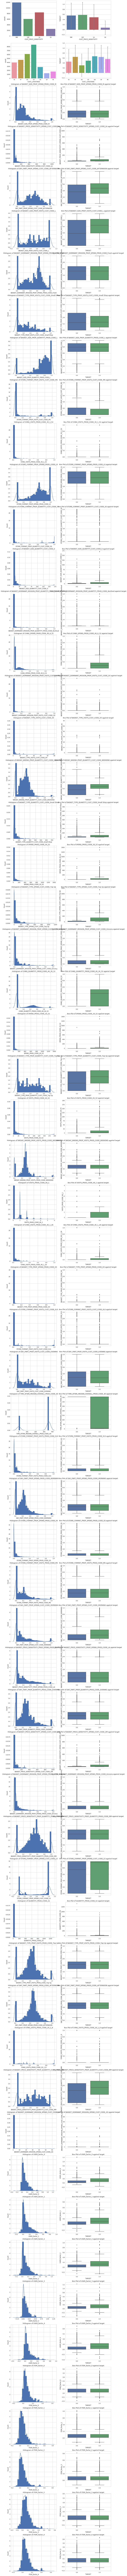

In [15]:
feat_list = top_features.columns.tolist()
feat_list.remove("TARGET")

fp.feature_profiling(df=top_features, feat=feat_list, target="TARGET", hist_bins=25)

Top Absolute Correlations


SPEND_PROD_CODE_30_52                                SPEND_PROD_CODE_20_52                                   0.802762
CHNG_VISITS_PROD_CODE_30_1_52                        CHNG_VISITS_PROD_CODE_40_1_26                           0.695785
BASKET_PRICE_SENSITIVITY_SPEND_CUST_CODE_UM          USER_factor_1                                           0.677874
BASKET_DOMINANT_MISSION_PROP_VISITS_CUST_CODE_XX     BASKET_TYPE_VISITS_CUST_CODE_XX                         0.673235
CHNG_SPEND_PROD_CODE_40_8_52                         CHNG_QUANTITY_PROD_CODE_40_26_52                        0.666079
CHNG_QUANTITY_PROD_CODE_40_26_52                     TIME_BTWN_MEDIAN_OVERALL_PROD_CODE_40                   0.656926
SPEND_PROD_CODE_20_52                                VISITS_PROD_CODE_20_52                                  0.650766
BASKET_PRICE_SENSITIVITY_SPEND_CUST_CODE_LA          USER_factor_2                                           0.632453
BASKET_SIZE_QUANTITY_CUST_CODE_S                     BAS

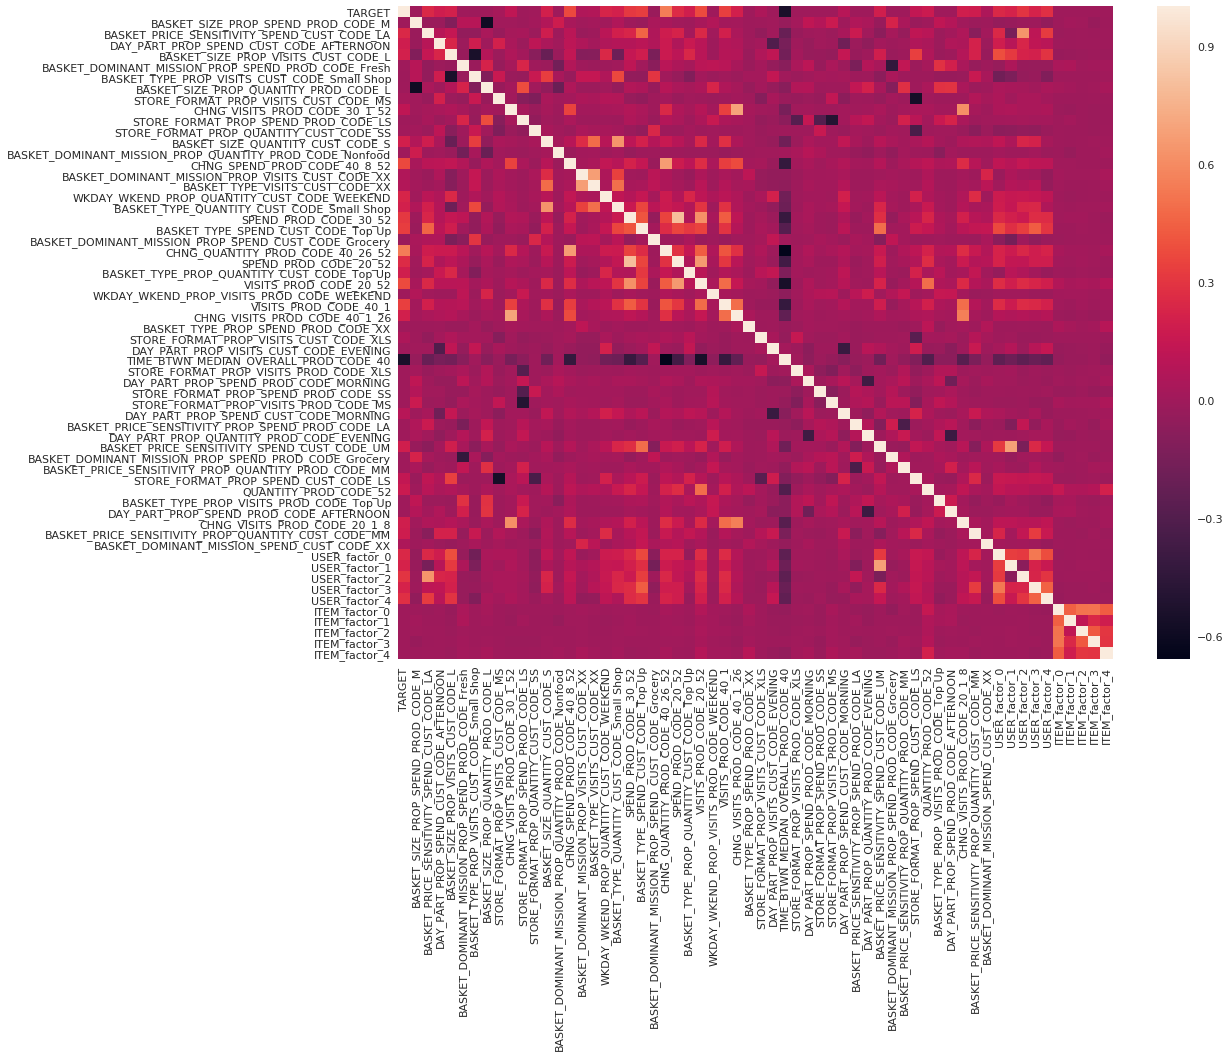

In [17]:
fp.get_paired_correlations(df=top_features, plot_heatmap=True, num_pairs=100)